ZOMATO DATA ANALYSIS

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [107]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


convert the data type of the “rate” column to float and remove the denominator.

In [108]:
def handleRate(value):
	value=str(value).split('/')
	value=value[0];
	return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


obtain a summary of the data frame

In [109]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


There is no NULL value in dataframe.

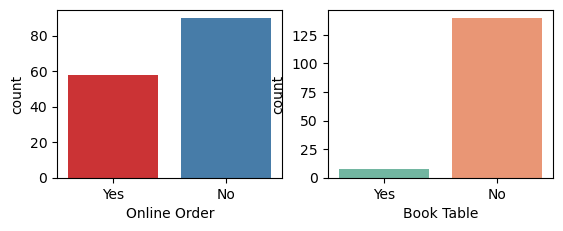

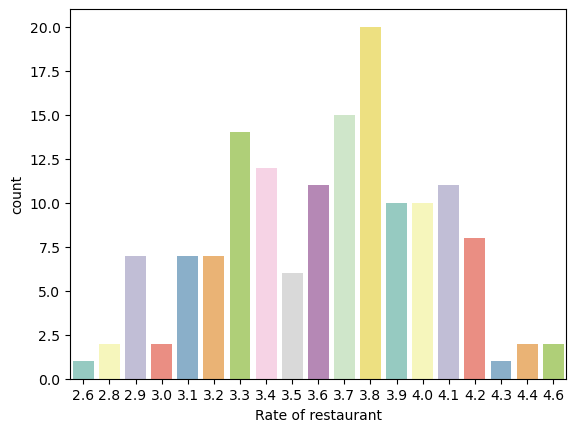

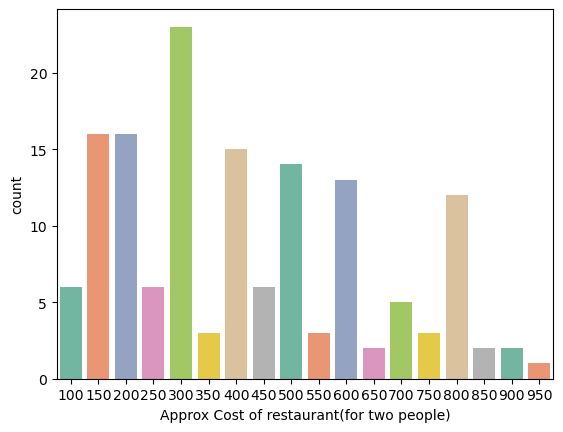

Text(0.5, 0, 'Type of restaurant')

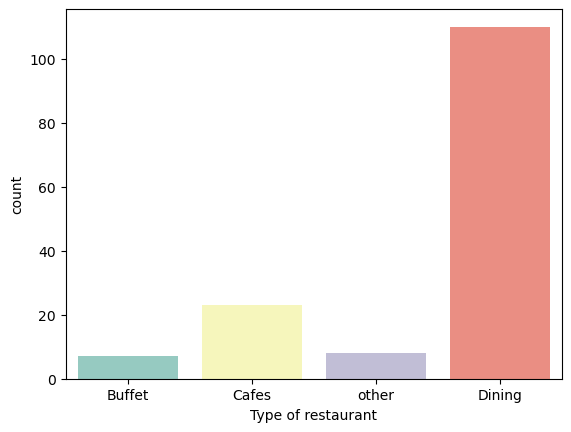

In [110]:
plt.subplot(221)
sns.countplot(x=dataframe['online_order'],palette='Set1')
plt.xlabel("Online Order")
plt.subplot(222)
sns.countplot(x=dataframe['book_table'],palette='Set2')
plt.xlabel("Book Table")
plt.show()

plt.subplot(111)
sns.countplot(x=dataframe['rate'],palette='Set3')
plt.xlabel("Rate of restaurant")
plt.show()

plt.subplot(111)
sns.countplot(x=dataframe['approx_cost(for two people)'],palette='Set2')
plt.xlabel("Approx Cost of restaurant(for two people)")
plt.show()

plt.subplot(111)
sns.countplot(x=dataframe['listed_in(type)'],palette='Set3')
plt.xlabel("Type of restaurant")

CONCLUSION:

    1) Maximum resturants do not accpet online orders.
    
    2) Maximum resturants do not book tables.
    
    3) Approximately 20 resturants have 3.8 rate.
    
    4) Maximum rate is obtained by approximately 2 resturants is 4.6.
    
    5) Minimum rate is obtained by approximately 1 resturant is 2.6.
    
    6) The majority of couples prefer restaurants with an approximate cost of 300 rupees.
    
    7) The majority of the restaurants fall into the dining category.

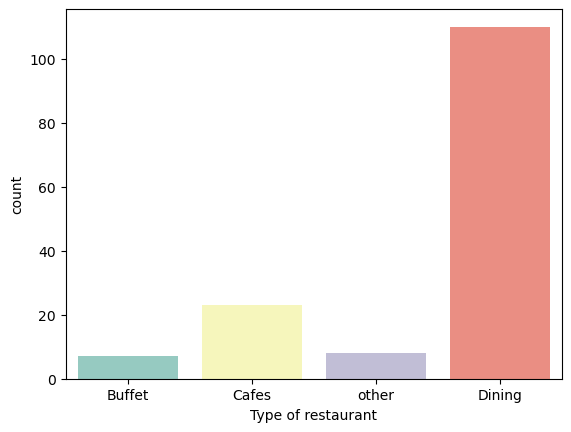

In [111]:
# Type of resturants
sns.countplot(x=dataframe['listed_in(type)'],palette='Set3')
plt.xlabel("Type of restaurant")
plt.show()

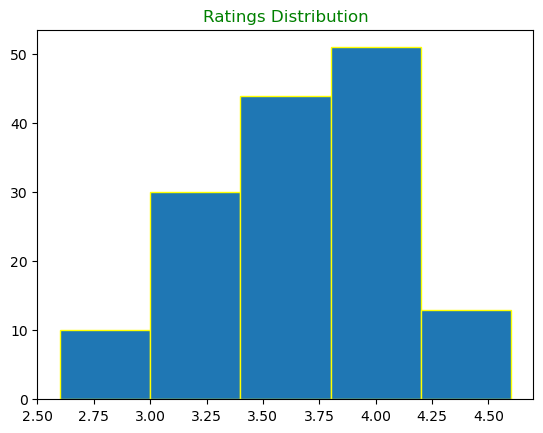

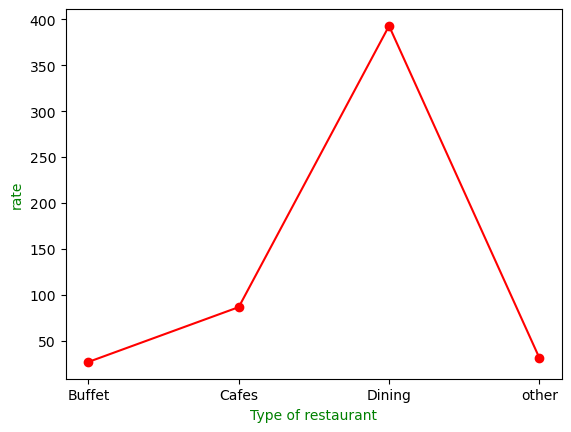

In [112]:
# Comparing types of resturants on the basis of rate attribute.
plt.subplot(111)
plt.hist(dataframe['rate'],bins=5,ec='yellow')
plt.title("Ratings Distribution",c='green')
plt.show()
plt.subplot(111)
grouped_data = dataframe.groupby('listed_in(type)')['rate'].sum()
result = pd.DataFrame({'rate': grouped_data})
plt.plot(result, c="red", marker="o")
plt.xlabel("Type of restaurant", color="green")
plt.ylabel("rate", c="green")
plt.show()


Dinning Resturants have higher rate

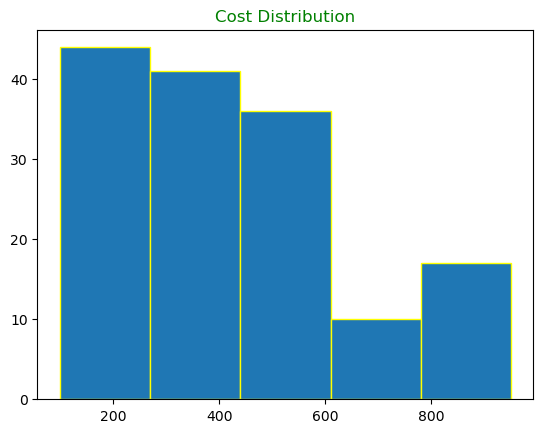

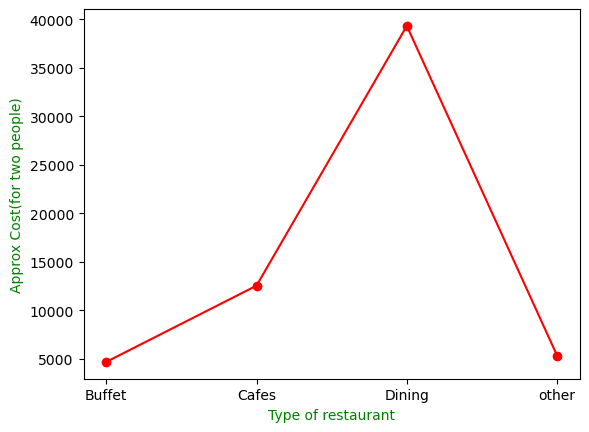

In [113]:
# Comparing types of resturants on the basis of cost attribute.
plt.subplot(111)
plt.hist(dataframe['approx_cost(for two people)'],bins=5,ec='yellow')
plt.title("Cost Distribution",c='green')
plt.show()
plt.subplot(111)
grouped_data = dataframe.groupby('listed_in(type)')['approx_cost(for two people)'].sum()
result = pd.DataFrame({'approx_cost(for two people)': grouped_data})
plt.plot(result, c="red", marker="o")
plt.xlabel("Type of restaurant", color="green")
plt.ylabel("Approx Cost(for two people)", c="green")
plt.show()

Dinning Resturants have higher cost per couple

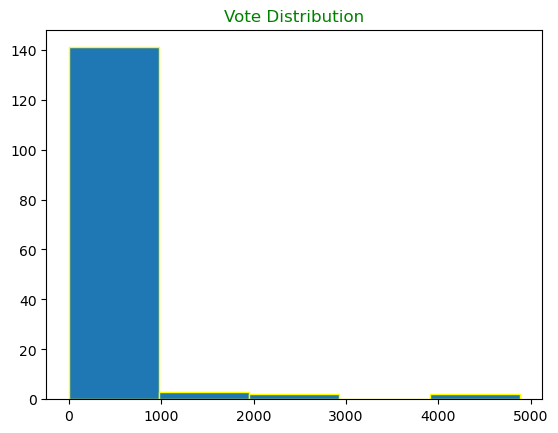

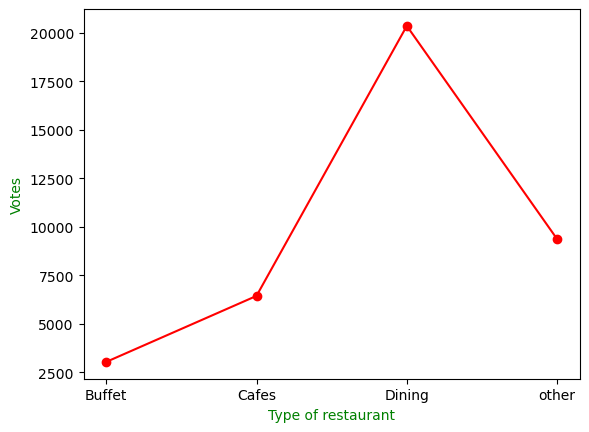

In [114]:
# Comparing types of resturants on the basis of votes.

plt.subplot(111)
plt.hist(dataframe['votes'],bins=5,ec='yellow')
plt.title("Vote Distribution",c='green')
plt.show()
plt.subplot(111)
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="red", marker="o")
plt.xlabel("Type of restaurant", color="green")
plt.ylabel("Votes", c="green")
plt.show()


Dining restaurants are preferred by a larger number of individuals.

In [115]:
fig=px.sunburst(dataframe,path=['listed_in(type)','online_order'],values='rate')
fig.update_layout(title_text='Rate of type of resturants with respect to online order',title_x=0.5)
fig.show()

fig=px.sunburst(dataframe,path=['listed_in(type)','online_order'],values='approx_cost(for two people)')
fig.update_layout(title_text='Approximate cost of two people of type of resturants with respect to online order',title_x=0.5)
fig.show()

fig=px.sunburst(dataframe,path=['listed_in(type)','online_order'],values='votes')
fig.update_layout(title_text='Votes to type of resturants with respect to online order',title_x=0.5)
fig.show()

In [116]:
fig=px.sunburst(dataframe,path=['listed_in(type)','book_table'],values='rate')
fig.update_layout(title_text='Rate of type of resturants with respect to Booking of table',title_x=0.5)
fig.show()

fig=px.sunburst(dataframe,path=['listed_in(type)','book_table'],values='approx_cost(for two people)')
fig.update_layout(title_text='Approximate cost of two people of type of resturants with respect to Booking of table',title_x=0.5)
fig.show()

fig=px.sunburst(dataframe,path=['listed_in(type)','book_table'],values='votes')
fig.update_layout(title_text='Votes to type of resturants with respect to Booking of table',title_x=0.5)
fig.show()

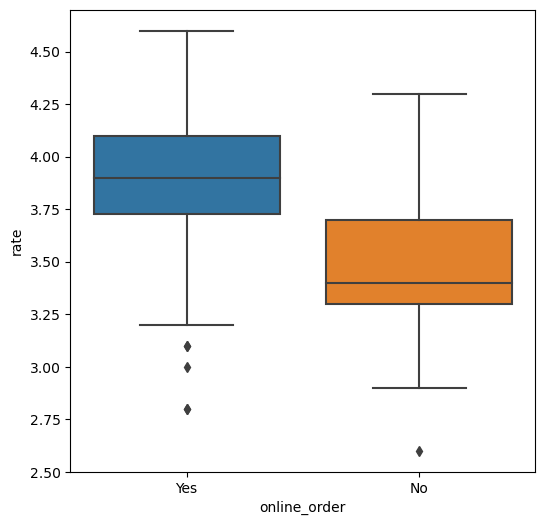

In [104]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)
plt.show()

Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

/var/folders/hx/kncd0mqj3l18dhlqcqg13p980000gn/T/ipykernel_1693/3197260760.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

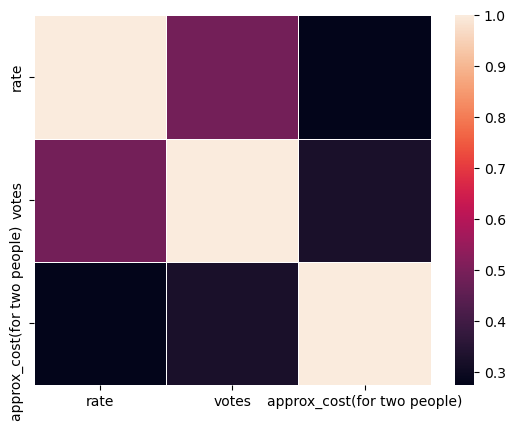

In [105]:
#correaltion map
sns.heatmap(dataframe.corr(),cbar=True,linewidths=0.5)

Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.